# Random Q. 

How do you handle maintaining stereo chemistry in your cages if your building block or expected reaction has stereochemistry built into it? 

From smiles, stereochem is kept, but then construction issue of high energy structure? How to fix?

In [46]:
import stk
import stko

from rdkit.Chem import AllChem as rdkit
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addStereoAnnotation = True

In [66]:
def show_stk_mol(stk_mol):
    mol = stk_mol.to_rdkit_mol()
    data = rdkit.MolToMolBlock(mol)
    p = py3Dmol.view(
        data=data,
        style={'stick':{'colorscheme':'cyanCarbon'}}, 
        width=400,
        height=400,
    )
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    p.show()
    
def rdkit_2d_draw(stk_mol):
    
    mol = stk_mol.to_rdkit_mol()
    print(rdkit.MolToSmiles(mol))
    rdkit.Compute2DCoords(mol)
    return mol

# SMILES to stk.Molecule maintains stereochemistry.

Therefore, the 3D geometry should be fine, unless it is modified during construction.

In [115]:
lalanine = stk.BuildingBlock('C[C@@H](C(=O)O)N')
dalanine = stk.BuildingBlock('C[C@H](C(=O)O)N')

In [116]:
show_stk_mol(dalanine)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [117]:
show_stk_mol(lalanine)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [118]:
trans1_isomer = stk.BuildingBlock('F/C=C/F', (stk.FluoroFactory(), ))
trans2_isomer = stk.BuildingBlock('F\C=C\F', (stk.FluoroFactory(), ))
cis1_isomer = stk.BuildingBlock('F/C=C\F', (stk.FluoroFactory(), ))
cis2_isomer = stk.BuildingBlock('F\C=C/F', (stk.FluoroFactory(), ))
whatami = stk.BuildingBlock('FC=CF', (stk.FluoroFactory(), ))

## Sadly, this info is lost in rdkit, but maintained structurally!

In [119]:
show_stk_mol(trans1_isomer)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

[H]C(F)=C([H])F


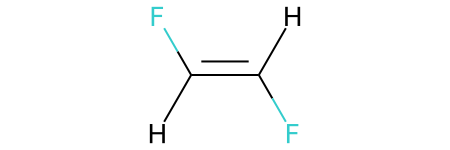

In [120]:
rdkit_2d_draw(trans1_isomer)

## Can recover from rdkit somehow.

In [131]:
a = trans1_isomer.to_rdkit_mol()
rdkit.AssignAtomChiralTagsFromStructure(a)

In [132]:
rdkit.MolToSmiles(a)

'[H]C(F)=C([H])F'

In [121]:
show_stk_mol(cis2_isomer)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

[H]C(F)=C([H])F


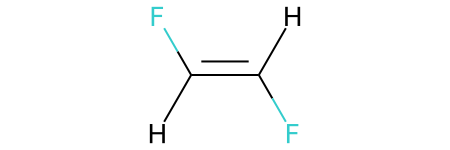

In [122]:
rdkit_2d_draw(cis2_isomer)

In [133]:
polymer = stk.ConstructedMolecule(
    topology_graph=stk.polymer.Linear(
        building_blocks=(trans1_isomer, cis1_isomer),
        repeating_unit='AB',
        num_repeating_units=2,
    ),
)

In [134]:
show_stk_mol(polymer)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [135]:
opt_poly = stko.MMFF().optimize(polymer)

In [136]:
show_stk_mol(opt_poly)
print('should be: TCTC')
print('       is: CTTT')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

should be: TCTC
       is: CTTT


## rdkit has lost this info too! Kind of.....

[H]C(F)=C([H])C([H])=C([H])C([H])=C([H])C([H])=C([H])F


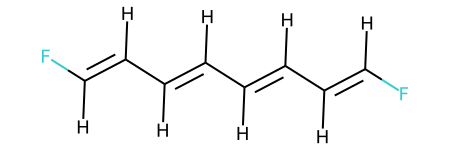

In [137]:
rdkit_2d_draw(polymer)

# The classic problem, is when the stereochemistry is at the site of the reaction

Here, the high energy outcome of stk can cause some optimisers to ruin your initial stereochem.

# Another example... CC3!

In [138]:
bb1 = stk.BuildingBlock(
    smiles='C1CCC(C(C1)N)N',
    functional_groups=[stk.PrimaryAminoFactory()],
)
bb2 = stk.BuildingBlock(
    smiles='C1=C(C=C(C=C1C=O)C=O)C=O',
    functional_groups=[stk.AldehydeFactory()],
)

cage = stk.ConstructedMolecule(
    topology_graph=stk.cage.FourPlusSix(
        building_blocks=(bb1, bb2),
        optimizer=stk.MCHammer(),
    ),
)

In [139]:
show_stk_mol(bb1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## What about this?!?!

In [140]:
show_stk_mol(bb2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [141]:
show_stk_mol(cage)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [142]:
bb1 = stk.BuildingBlock.init_from_file(
    path='one_i_did_earlier.mol',
    functional_groups=[stk.PrimaryAminoFactory()],
)
bb2 = stk.BuildingBlock(
    smiles='C1=C(C=C(C=C1C=O)C=O)C=O',
    functional_groups=[stk.AldehydeFactory()],
)

cage = stk.ConstructedMolecule(
    topology_graph=stk.cage.FourPlusSix(
        building_blocks=(bb1, bb2),
        # optimizer=stk.MCHammer(),
    ),
)

In [144]:
show_stk_mol(bb1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [145]:
bb1 = stk.BuildingBlock.init_from_file(
    path='one_i_did_earlier.mol',
    functional_groups=[stk.PrimaryAminoFactory()],
)
bb2 = stk.BuildingBlock(
    smiles='C1=C(C=C(C=C1C=O)C=O)C=O',
    functional_groups=[stk.AldehydeFactory()],
)

cage = stk.ConstructedMolecule(
    topology_graph=stk.cage.FourPlusSix(
        building_blocks=(bb1, bb2),
        optimizer=stk.MCHammer(),
    ),
)

In [146]:
show_stk_mol(cage)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Maybe an approach for CC3?

In [147]:
show_stk_mol(stk.BuildingBlock('C1CC[C@@]([H])(/N=C/Br)[C@]([H])(/N=C/Br)C1'))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# A solution: we can break structures such that stereochem is maintained

E.g. this is what I do in MOCs.

In [148]:
# Produce a Fe+2 atom with 6 functional groups.
iron_atom = stk.BuildingBlock(
    smiles='[Fe+2]',
    functional_groups=(
        stk.SingleAtom(stk.Fe(0, charge=2))
        for i in range(6)
    ),
    position_matrix=[[0, 0, 0]],
)

# Define coordinating ligand with dummy bromine groups and
# metal coordinating functional groups.
bb2 = stk.BuildingBlock(
    smiles='C1=NC(C=NBr)=CC=C1',
    functional_groups=[
        stk.SmartsFunctionalGroupFactory(
            smarts='[#6]~[#7X2]~[#35]',
            bonders=(1, ),
            deleters=(),
        ),
        stk.SmartsFunctionalGroupFactory(
            smarts='[#6]~[#7X2]~[#6]',
            bonders=(1, ),
            deleters=(),
        ),
    ],
)

# Build iron complex with delta stereochemistry.
iron_oct_delta = stk.ConstructedMolecule(
    topology_graph=stk.metal_complex.OctahedralDelta(
        metals=iron_atom,
        ligands=bb2,
        optimizer=stk.MCHammer(),
    ),
)

# Assign Bromo functional groups to the metal complex.
iron_oct_delta = stk.BuildingBlock.init_from_molecule(
    molecule=iron_oct_delta,
    functional_groups=[stk.BromoFactory()],
)

# Build iron complex with delta stereochemistry.
iron_oct_lambda = stk.ConstructedMolecule(
    topology_graph=stk.metal_complex.OctahedralLambda(
        metals=iron_atom,
        ligands=bb2,
        optimizer=stk.MCHammer(),
    ),
)

# Assign Bromo functional groups to the metal complex.
iron_oct_lambda = stk.BuildingBlock.init_from_molecule(
    molecule=iron_oct_delta,
    functional_groups=[stk.BromoFactory()],
)

# Define spacer building block.
bb3 = stk.BuildingBlock(
    smiles=(
        'C1=CC(C2=CC=C(Br)C=C2)=C'
        'C=C1Br'
    ),
    functional_groups=[stk.BromoFactory()],
)

# Build an M4L6 Tetrahedron with a spacer.
cage2 = stk.ConstructedMolecule(
    topology_graph=stk.cage.M4L6TetrahedronSpacer(
        building_blocks=(
            iron_oct_delta,
            bb3,
        ),
        optimizer=stk.MCHammer(),
    ),
)
cage2.write('deltacage.mol')
cage2 = stk.ConstructedMolecule(
    topology_graph=stk.cage.M4L6TetrahedronSpacer(
        building_blocks=(
            iron_oct_lambda,
            bb3,
        ),
        optimizer=stk.MCHammer(),
    ),
)
cage2.write('lambdacage.mol')

<ConstructedMolecule at 139911650439664>

In [151]:
show_stk_mol(cage2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol